<a href="https://colab.research.google.com/github/nkevin90/Time-Series-on-the-Housing-Data-Zillow-Research/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Modeling for Real Estate Investments: A Consultant's Guide to Identifying the Best Zip Codes using Zillow Research Data

# **1. Introduction and Overview**

# Defining the Question
 Build predictive models to determine the top five best zip codes for the Naruto Investments to invest in based on Zillow research.

# Objectives
**Main Objective**

To build a model that would predict the future prices of houses for the company to invest in

**Specific Objectives**

To find change in house prices over 
To analyze and interpret market trends, economic indicators, neighborhood analysis, regulatory environment, and competitive analysis to determine the best zip codes for investmen

# Metric Of Success
Model will be considered a success when it achieves a low RMSE and the ROI is adequate

# Context

Real estate refers to land, buildings, and other physical property, including natural resources such as crops, minerals, or water, that can be bought, sold, leased, or rented for various purposes. Real estate is a significant part of the global economy and is used for residential, commercial, industrial, and agricultural purposes. Real estate investments can provide both short-term and long-term returns through rental income, property appreciation, and value-added investments such as renovations and developments. The real estate industry also involves various professionals, such as real estate agents, brokers, appraisers, and developers, who provide services related to the buying, selling, leasing, and management of properties.

Naruto a real estate investment firm wants to make an informed investment decision by leveraging data-driven insights. As a consultant, the task is to analyze the Zillow Research real estate price dataset using time-series modeling techniques and recommend the top 5 best zip codes for investment.The consultant needs to understand the firm's investment objectives, risk tolerance, and time horizon to provide a comprehensive and justified recommendation. The recommendation needs to consider 


# Data Description


*   RegionName: Represents the name of the region.
*   RegionID: Represents a unique ID for each region

*   SizeRank: Represents the relative size of the region compared to other regions in the dataset

*   City: Represents the city where the region is located.
*   State: Represents the state where the region is located.


*   Metro: Represents the metropolitan area where the region is located (if applicable).
*   CountyName: Represents the name of the county where the region is located.
*   1996 upto 2018: Represents the median home value for the region in months and years

# Experimental Design
1. Importing libraries
2. Reviewing the data
3. Checking data for anomalies and errors
4. Tidying the dataset
5. Performing Exploratory Data Analysis
6. Model Development
7. Conclusions and Reccomendations





# **2. External Dataset Validation**

# **3. Importing Libraries**


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={"figure.figsize":(8, 6)})

# **4. Loading Dataset**

In [ ]:
df = pd.read_csvdf = pd.read_csv('/content/zillow_data.csv',sep=',',
                  lineterminator='\r',
                  error_bad_lines=False)
df.head()

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 560: expected 272 fields, saw 288\nSkipping line 1688: expected 272 fields, saw 365\n'
/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657.0,Chicago,IL,Chicago,Cook,1.0,334200.0,335400.0,336500.0,...,1005500.0,1007500.0,1007800.0,1009600.0,1013300.0,1018700.0,1024400.0,1030700.0,1033800.0,1030600.0
1,90668,75070.0,McKinney,TX,Dallas-Fort Worth,Collin,2.0,235700.0,236900.0,236700.0,...,308000.0,310000.0,312500.0,314100.0,315000.0,316600.0,318100.0,319600.0,321100.0,321800.0
2,91982,77494.0,Katy,TX,Houston,Harris,3.0,210400.0,212200.0,212200.0,...,321000.0,320600.0,320200.0,320400.0,320800.0,321200.0,321200.0,323000.0,326900.0,329900.0
3,84616,60614.0,Chicago,IL,Chicago,Cook,4.0,498100.0,500900.0,503100.0,...,1289800.0,1287700.0,1287400.0,1291500.0,1296600.0,1299000.0,1302700.0,1306400.0,1308500.0,1307000.0
4,93144,79936.0,El Paso,TX,El Paso,El Paso,5.0,77300.0,77300.0,77300.0,...,119100.0,119400.0,120000.0,120300.0,120300.0,120300.0,120300.0,120500.0,121000.0,121500.0


In [ ]:
#Checking the last rows
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14717,\n59107,3293.0,Woodstock,NH,Claremont,Grafton,14720.0,92700.0,92500.0,92400.0,...,202100.0,208400.0,212200.0,215200.0,214300.0,213100.0,213700.0,218300.0,222700.0,225800.0
14718,\n75672,40404.0,Berea,KY,Richmond,Madison,14721.0,57100.0,57300.0,57500.0,...,121800.0,122800.0,124600.0,126700.0,128800.0,130600.0,131700.0,132500.0,133000.0,133400.0
14719,\n93733,81225.0,Mount Crested Butte,CO,NaN,Gunnison,14722.0,191100.0,192400.0,193700.0,...,662800.0,671200.0,682400.0,695600.0,695500.0,694700.0,706400.0,705300.0,681500.0,664400.0
14720,\n95851,89155.0,Mesquite,NV,Las Vegas,Clark,14723.0,176400.0,176300.0,176100.0,...,333800.0,336400.0,339700.0,343800.0,346800.0,348900.0,350400.0,353000.0,356000.0,357200.0
14721,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **5. Reviewing Dataset**

In [ ]:
#Checking the number of rows and columns of our dataset
df.shape

(14722, 272)

In [ ]:
#Checking columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14722 entries, 0 to 14721
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(267), object(5)
memory usage: 30.6+ MB


In [ ]:
#Checking for sum of duplicates
df.duplicated().sum()

0

There are no duplicates present in the dataset.

In [ ]:
#Checking the data types
df.dtypes

RegionID       object
RegionName    float64
City           object
State          object
Metro          object
               ...   
2017-12       float64
2018-01       float64
2018-02       float64
2018-03       float64
2018-04       float64
Length: 272, dtype: object

In [ ]:
#statistical description of numerical variables
df.describe()

,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14721.000000,14721.000000,1.368200e+04,1.368200e+04,1.368200e+04,1.368200e+04,1.368200e+04,1.368200e+04,1.368200e+04,1.368200e+04,...,1.472000e+04,1.472000e+04,1.472000e+04,1.472000e+04,1.472000e+04,1.472000e+04,1.472000e+04,1.472000e+04,1.472000e+04,1.472000e+04
mean,48219.425650,7362.885945,1.182886e+05,1.184084e+05,1.185267e+05,1.186422e+05,1.187692e+05,1.189164e+05,1.191092e+05,1.193339e+05,...,2.733090e+05,2.748394e+05,2.764383e+05,2.780069e+05,2.794946e+05,2.810692e+05,2.826310e+05,2.843429e+05,2.864861e+05,2.880151e+05
std,29359.691526,4249.916031,8.599126e+04,8.614434e+04,8.629772e+04,8.645621e+04,8.663893e+04,8.685978e+04,8.713929e+04,8.746703e+04,...,3.604114e+05,3.614808e+05,3.627694e+05,3.644743e+05,3.656137e+05,3.670589e+05,3.695867e+05,3.717883e+05,3.724759e+05,3.720690e+05
min,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,1.220000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,22101.000000,3683.000000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.940000e+04,6.950000e+04,6.960000e+04,6.980000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292750e+05,1.299000e+05,1.306000e+05,1.310750e+05,1.319750e+05,1.324000e+05
50%,46077.000000,7363.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,1.001000e+05,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.924500e+05,1.933500e+05,1.940500e+05,1.950000e+05,1.967000e+05,1.980500e+05
75%,75205.000000,11043.000000,1.432000e+05,1.433000e+05,1.432000e+05,1.432000e+05,1.435000e+05,1.437000e+05,1.439000e+05,1.441000e+05,...,3.049250e+05,3.065250e+05,3.084000e+05,3.098000e+05,3.116250e+05,3.134000e+05,3.150000e+05,3.168000e+05,3.188000e+05,3.211000e+05
max,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,3.888900e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [ ]:
#statistical description of categorical variables
df.describe(include=['object'])


,RegionID,City,State,Metro,CountyName
count,14722,14721,14721,13678,14721
unique,14722,7553,51,701,1212
top,84654,New York,CA,New York,Los Angeles
freq,1,114,1224,779,264


In [ ]:
# Consider dropping regionid since all its values are unique

In [ ]:
melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
melted

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value
0,60657.0,84654,1.0,Chicago,IL,Chicago,Cook,1996-04,334200.0
1,75070.0,90668,2.0,McKinney,TX,Dallas-Fort Worth,Collin,1996-04,235700.0
2,77494.0,91982,3.0,Katy,TX,Houston,Harris,1996-04,210400.0
3,60614.0,84616,4.0,Chicago,IL,Chicago,Cook,1996-04,498100.0
4,79936.0,93144,5.0,El Paso,TX,El Paso,El Paso,1996-04,77300.0
...,...,...,...,...,...,...,...,...,...
3901325,3293.0,\n59107,14720.0,Woodstock,NH,Claremont,Grafton,2018-04,225800.0
3901326,40404.0,\n75672,14721.0,Berea,KY,Richmond,Madison,2018-04,133400.0
3901327,81225.0,\n93733,14722.0,Mount Crested Butte,CO,NaN,Gunnison,2018-04,664400.0
3901328,89155.0,\n95851,14723.0,Mesquite,NV,Las Vegas,Clark,2018-04,357200.0


In [ ]:
melted.columns

Index(['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro',
       'CountyName', 'time', 'value'],
      dtype='object')

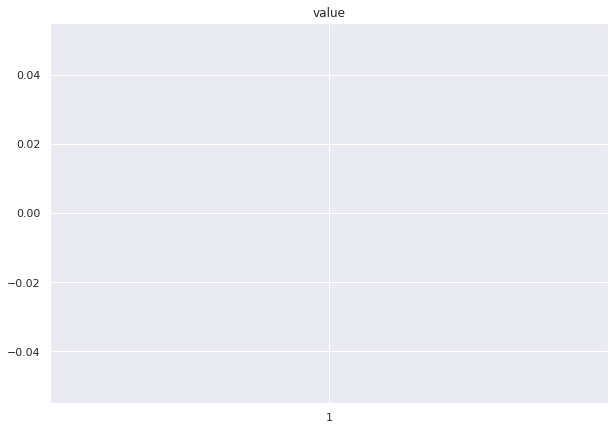

In [ ]:
#Checking for outliers in value column

col=['value']
for i in col:
  fig=plt.figure(figsize = (10,7))
  plt.boxplot(melted[i])
  plt.title(i)
  plt.show()
     

# **6. Exploratory Data Analysis**



# **Univariate Analysis**

# Counties

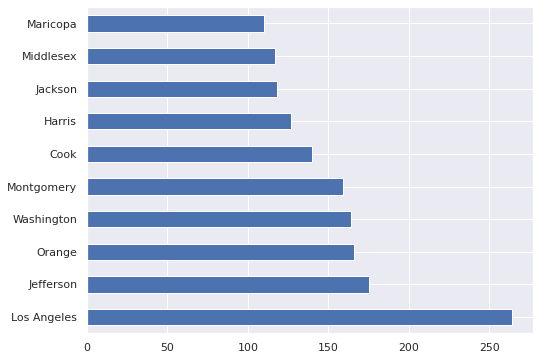

In [ ]:
top_10counties = df['CountyName'].value_counts().nlargest(10)
top_10counties.plot(kind='barh')
plt.show()

Los Angeles is the most common county followed by Jefferson and Orange

# State

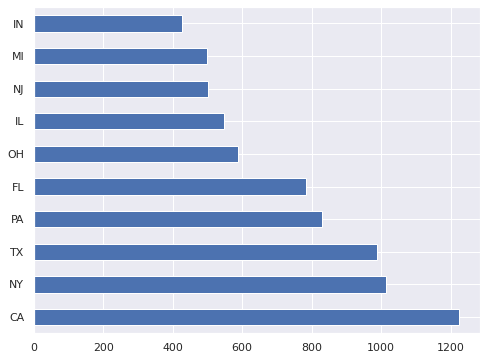

In [ ]:
top_10states = df['State'].value_counts().nlargest(10)
top_10states.plot(kind='barh')
plt.show()

Carlifornia is the most common state followed by New York and Texas

# Cities

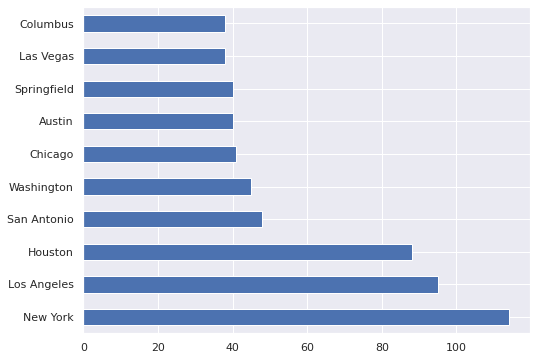

In [ ]:
top_10cities = df['City'].value_counts().nlargest(10)
top_10cities.plot(kind='barh')
plt.show()

New York is the most popular city followed by Los Angeles and Houston

# **Bivariate Analysis**

In [ ]:
correlations = df.corr()
correlations

,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionName,1.000000,-0.153854,0.093833,0.094012,0.094207,0.094448,0.094729,0.095023,0.095356,0.095730,...,0.105444,0.106478,0.107664,0.108988,0.110639,0.112374,0.113472,0.114472,0.116149,0.117450
SizeRank,-0.153854,1.000000,-0.163510,-0.163169,-0.162872,-0.162629,-0.162429,-0.162244,-0.162049,-0.161870,...,-0.163001,-0.163729,-0.164621,-0.165444,-0.166317,-0.167130,-0.167654,-0.168000,-0.168636,-0.169201
1996-04,0.093833,-0.163510,1.000000,0.999964,0.999859,0.999687,0.999456,0.999169,0.998828,0.998443,...,0.866841,0.865658,0.864198,0.862701,0.860890,0.859269,0.858017,0.856894,0.855935,0.855459
1996-05,0.094012,-0.163169,0.999964,1.000000,0.999965,0.999861,0.999694,0.999467,0.999182,0.998845,...,0.867324,0.866140,0.864681,0.863188,0.861377,0.859756,0.858505,0.857381,0.856420,0.855946
1996-06,0.094207,-0.162872,0.999859,0.999965,1.000000,0.999965,0.999864,0.999699,0.999473,0.999189,...,0.867848,0.866664,0.865206,0.863719,0.861910,0.860290,0.859040,0.857915,0.856955,0.856482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12,0.112374,-0.167130,0.859269,0.859756,0.860290,0.860861,0.861452,0.862081,0.862828,0.863677,...,0.998846,0.999200,0.999509,0.999739,0.999932,1.000000,0.999967,0.999878,0.999590,0.999183
2018-01,0.113472,-0.167654,0.858017,0.858505,0.859040,0.859613,0.860206,0.860838,0.861588,0.862441,...,0.998578,0.998960,0.999300,0.999565,0.999820,0.999967,1.000000,0.999953,0.999701,0.999321
2018-02,0.114472,-0.168000,0.856894,0.857381,0.857915,0.858488,0.859082,0.859716,0.860468,0.861323,...,0.998265,0.998672,0.999057,0.999371,0.999677,0.999878,0.999953,1.000000,0.999868,0.999543
2018-03,0.116149,-0.168636,0.855935,0.856420,0.856955,0.857530,0.858126,0.858763,0.859519,0.860380,...,0.997509,0.998000,0.998485,0.998888,0.999297,0.999590,0.999701,0.999868,1.000000,0.999885


# **State vs Value**

In [ ]:
grouped = melted.groupby('State')
state_values = grouped['value'].mean()
state_values_df = state_values.reset_index(name='mean_value')
state_values_df = state_values_df.sort_values(by='mean_value', ascending=False)
top_five_states_df = state_values_df.head(5)

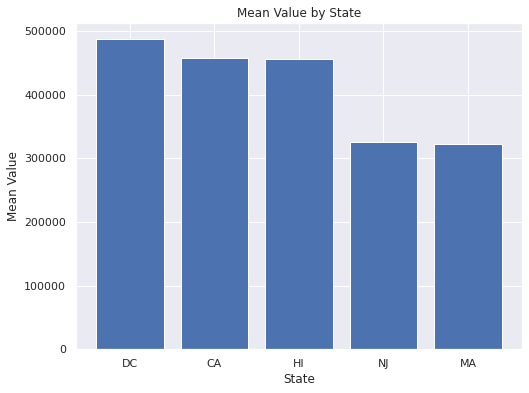

In [ ]:
plt.bar(top_five_states_df['State'], top_five_states_df['mean_value'])
plt.xlabel('State')
plt.ylabel('Mean Value')
plt.title('Mean Value by State')
plt.show()

DC is the highest grossing state followed by California

# **Cities vs Values**

In [ ]:
grouped = melted.groupby('City')
city_values = grouped['value'].mean()
city_values_df = city_values.reset_index(name='mean_value')
city_values_df = city_values_df.sort_values(by='mean_value', ascending=False)
top_five_cities_df = city_values_df.head(5)

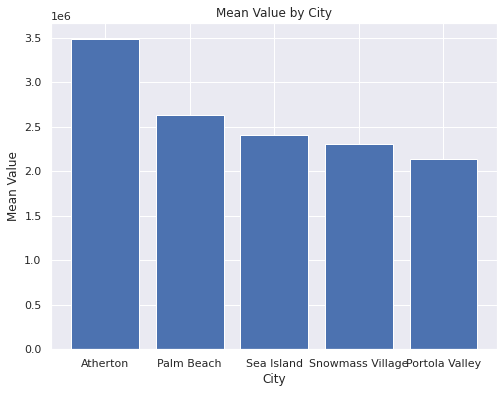

In [ ]:
plt.bar(top_five_cities_df['City'], top_five_cities_df['mean_value'])
plt.xlabel('City')
plt.ylabel('Mean Value')
plt.title('Mean Value by City')
plt.show();

Atherton is the highest grossing city followed by Palm Beach and then Sea Island City.

# **County vs Value**

In [ ]:
grouped = melted.groupby('CountyName')
county_values = grouped['value'].mean()
county_values_df = county_values.reset_index(name='mean_value')
county_values_df = county_values_df.sort_values(by='mean_value', ascending=False)
top_five_counties_df = county_values_df.head(5)

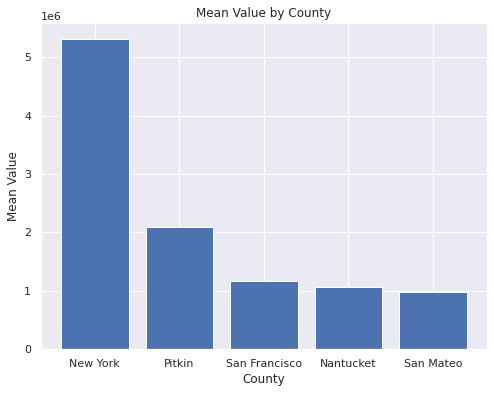

In [ ]:
plt.bar(top_five_counties_df['CountyName'], top_five_counties_df['mean_value'])
plt.xlabel('County')
plt.ylabel('Mean Value')
plt.title('Mean Value by County')
plt.show();

New York is the highest grossing county followed by Pitkin and then San Francisco comes in third.

In [ ]:
melted.columns

Index(['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro',
       'CountyName', 'time', 'value'],
      dtype='object')

# **7. MODEL DEVELOPMENT**

In [ ]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# **8. Conclusions and Recommendations**

In [ ]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [ ]:
melt_data(df)

,value
time,
1996-04-01,118288.561614
1996-05-01,118408.419822
1996-06-01,118526.699313
1996-07-01,118642.216050
1996-08-01,118769.244263
...,...
2017-12-01,281069.225543
2018-01-01,282631.019022
2018-02-01,284342.873641


In [ ]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted